# <center> **Coded Apertures: 2D Image Recostruction Test 2**<center>

**Libraries**

In [1]:
import numpy as np
from matplotlib.colors import ListedColormap as lc

import plot_module as plot
import maskpattern as mp
import codedmaskinterface as cmi
import codedapertureimaging as cai
from test_codedapertureimaging import TestReconstruction


np.set_printoptions(precision=2, suppress=False)

In [49]:
import importlib
importlib.reload(cai)

<module 'codedapertureimaging' from '/home/starfloyd/PhD_Coding/MasksReconstructionTest/Img_Reconstruction_2D/codedapertureimaging.py'>

## **2D URA/MURA Masks**

**Sky Simulation**

In [2]:
sky_img_shape = mp.URAMaskPattern(4).prime_pair

sources_flux = [30, 50, 70]
sources_pos = [(np.random.randint(0, sky_img_shape[0]), np.random.randint(0, sky_img_shape[1]))
               for _ in range(len(sources_flux))]
sky_background_rate = 2

args = (sky_img_shape, sources_flux, sources_pos, sky_background_rate)

In [3]:
sky_image, sky_background = cai.sky_image_simulation(*args)

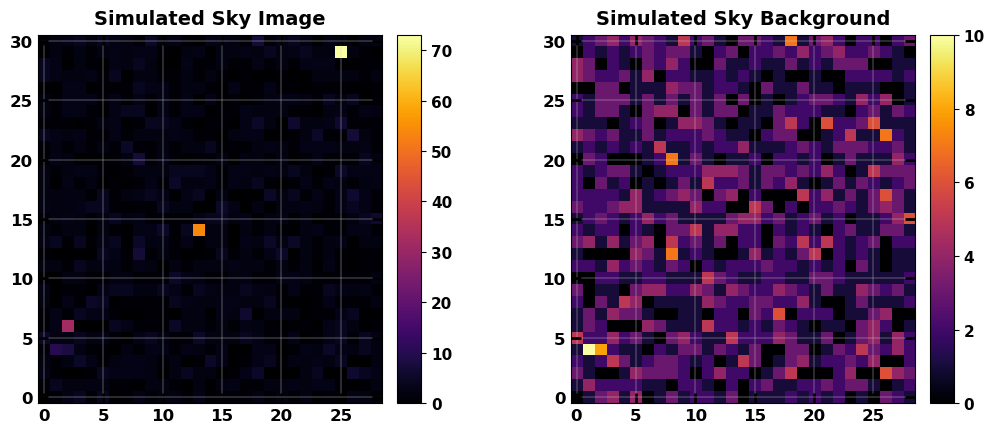

In [4]:
flag = True

if flag:
    if not sky_background_rate: sky_background = np.zeros(sky_img_shape)
    plot.image_plot([sky_image, sky_background],
                    ["Simulated Sky Image", "Simulated Sky Background"],
                    cbarcmap=["inferno", "inferno"])

### **URA Mask Pattern**

**Sky Reconstruction Simulation: mask with no padding**

In [5]:
pattern_type = 'ura'
rank = 2
sources_flux = np.array([30, 50, 70])
mask_padding = False
sky_background_rate = 5
sources_pos = None
detector_background_rate = None
print_info = True

cai_args_ura_nopad = (pattern_type, rank, sources_flux, mask_padding, sky_background_rate,
                      sources_pos, detector_background_rate, print_info)

In [6]:
detector_image, sky_reconstruction, source_info = cai.cai_simulation(*cai_args_ura_nopad)

Mask pattern type: URA
 Basic pattern shape: (13, 11)
 Mask shape: (13, 11)
 Decoder shape: (13, 11)
 Detector image shape: (13, 11)
 Sky reconstruction image shape: (13, 11)


**Mask and Sky Interface**

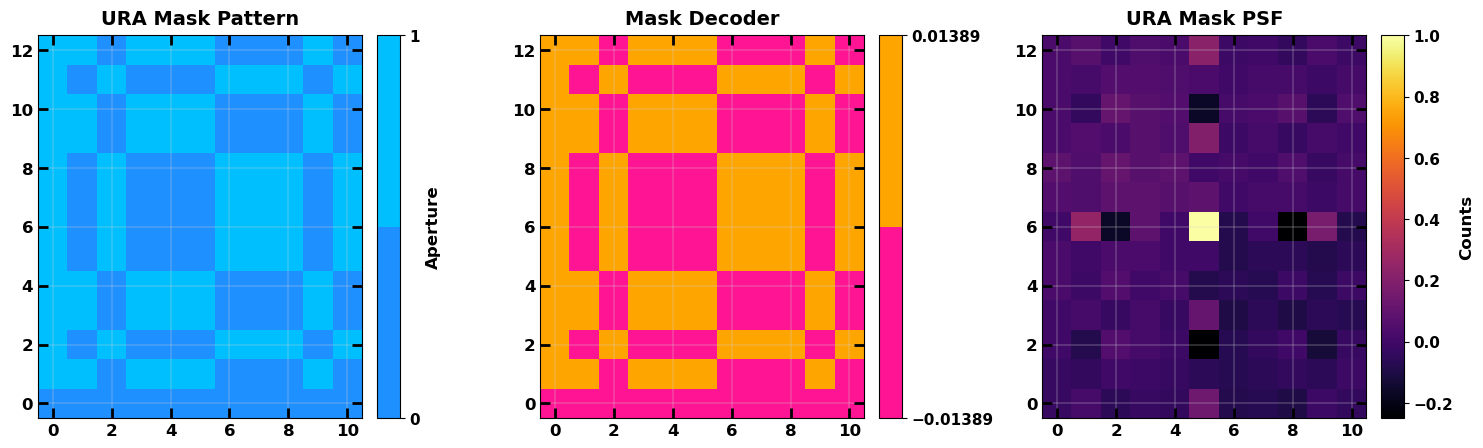

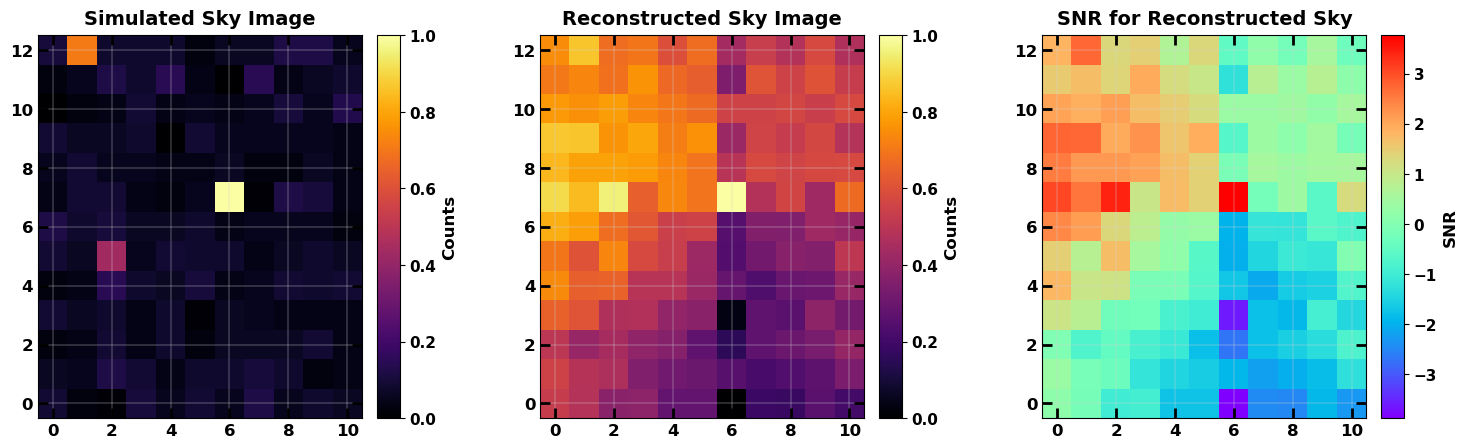

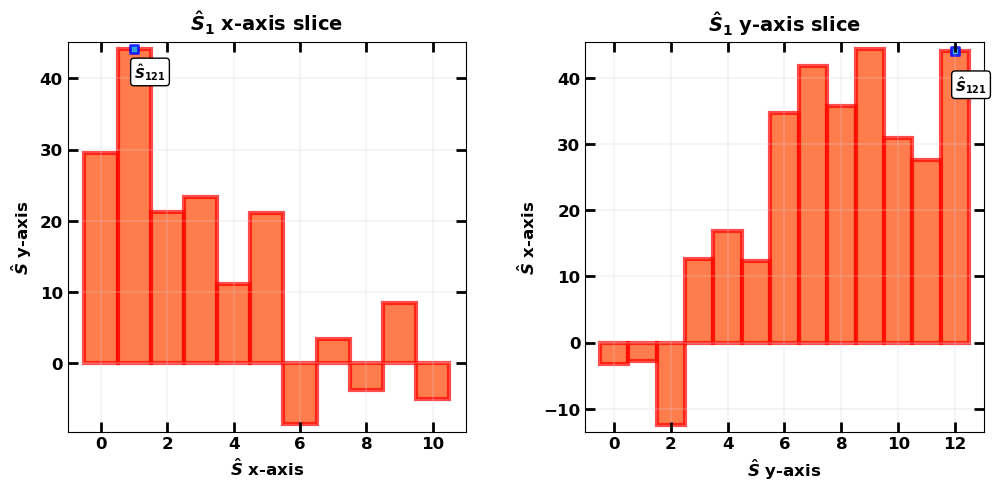

In [10]:
def _normalize(array):
    return (array - array.min())/(array.max() - array.min())

# plot mask, decoder and PSF
mask = source_info['mask_pattern']
decoder = source_info['mask_decoder']
psf = source_info['mask_PSF']

plot.image_plot([mask, decoder, psf],
                ["URA Mask Pattern", "Mask Decoder", "URA Mask PSF"],
                cbarlabel=["Aperture", None, "Counts"],
                cbarvalues=[[0, 1], [decoder.min(), decoder.max()], None],
                cbarcmap=[lc(["DodgerBlue", "DeepSkyBlue"]), lc(["DeepPink", "Orange"]), "inferno"])

# plot sky image, sky reconstruction and SNR
sky_image = source_info['sky_image']
snr = source_info['sky_reconstruction_SNR']

plot.image_plot([_normalize(sky_image), _normalize(sky_reconstruction), snr],
                ["Simulated Sky Image", "Reconstructed Sky Image", "SNR for Reconstructed Sky"],
                cbarlabel=["Counts"]*2 + ["SNR"],
                cbarvalues=[None]*3,
                cbarcmap=["inferno"]*2 + ["rainbow"])

# plot reconstr_sky slices
idx = 1
pos = source_info['sources_pos'][idx]
S_hat_slicex = sky_reconstruction[pos[0], :]
S_hat_slicey = sky_reconstruction[:, pos[1]]

plot.sequence_plot([S_hat_slicex, S_hat_slicey],
                   [f"$\\hat{{S}}_{idx}$ x-axis slice", f"$\\hat{{S}}_{idx}$ y-axis slice"],
                   xlabel=["$\\hat{{S}}$ x-axis", "$\\hat{{S}}$ y-axis"],
                   ylabel=["$\\hat{{S}}$ y-axis", "$\\hat{{S}}$ x-axis"],
                   style=["bar"]*2,
                   simulated_sources=[(pos[1], *pos, -4), (pos[0], *pos, -6)])

**Tests**

In [13]:
test_ura_nopad = TestReconstruction(pattern_type)
tol = 10

test_ura_nopad.test_sky_reconstruction(sky_reconstruction, sky_image, tol)
test_ura_nopad.test_sources_reconstruction(source_info['reconstructed_fluxes'], source_info['sky_image_fluxes'], tol)

#### URA Coded Mask Sky Reconstruction Test ####
|S_hat - S| < 10 : False

#### URA Coded Mask Sources Intensity Reconstruction Test ####
|S_hat[0] - S[0]| < 10 : True
|S_hat[1] - S[1]| < 10 : True
|S_hat[2] - S[2]| < 10 : False


array([ True,  True, False])

**Sky Reconstruction Simulation: mask with padding**

In [14]:
pattern_type = 'ura'
rank = 2
sources_flux = np.array([30, 50, 70])
mask_padding = True
sky_background_rate = 5
sources_pos = None
detector_background_rate = None
print_info = True

cai_args_ura = (pattern_type, rank, sources_flux, mask_padding, sky_background_rate,
                sources_pos, detector_background_rate, print_info)

detector_image, sky_reconstruction, source_info = cai.cai_simulation(*cai_args_ura)

Mask pattern type: URA
 Basic pattern shape: (13, 11)
 Mask shape: (25, 21)
 Decoder shape: (25, 21)
 Detector image shape: (13, 11)
 Sky reconstruction image shape: (13, 11)


**Mask and Sky Interface**

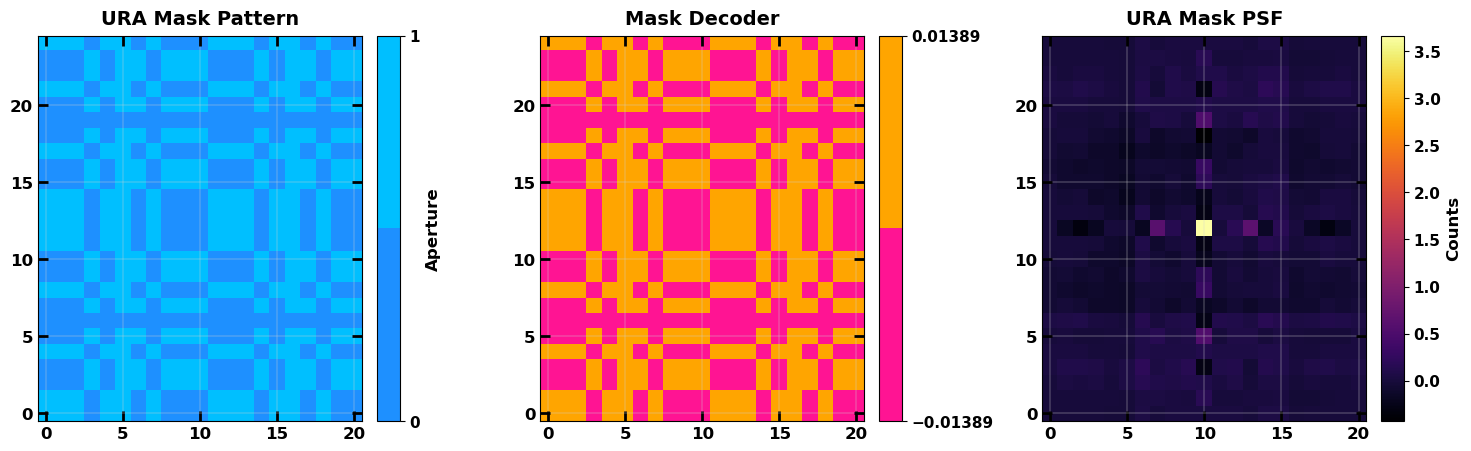

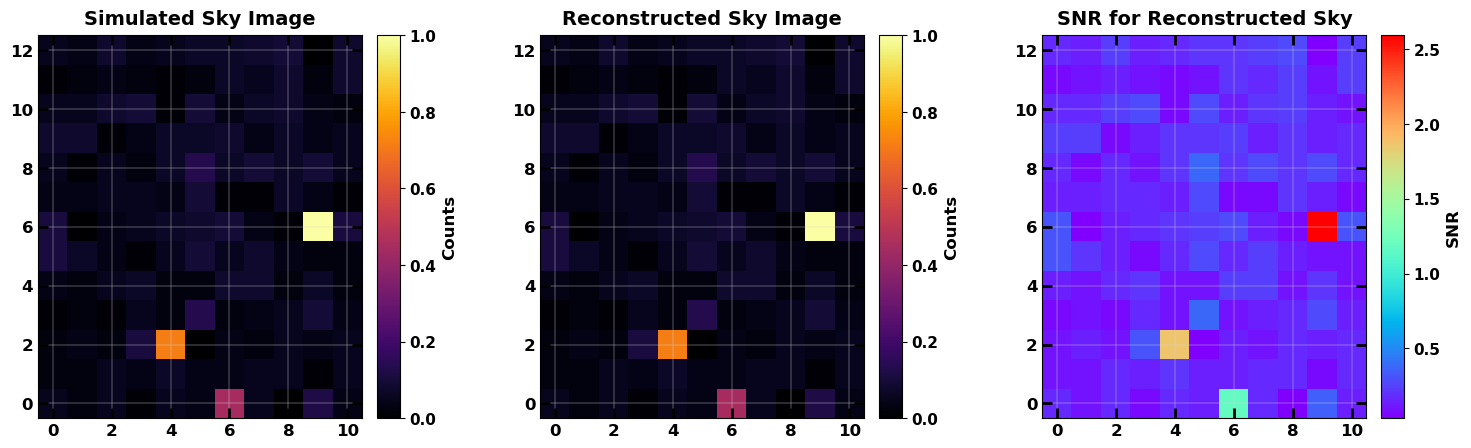

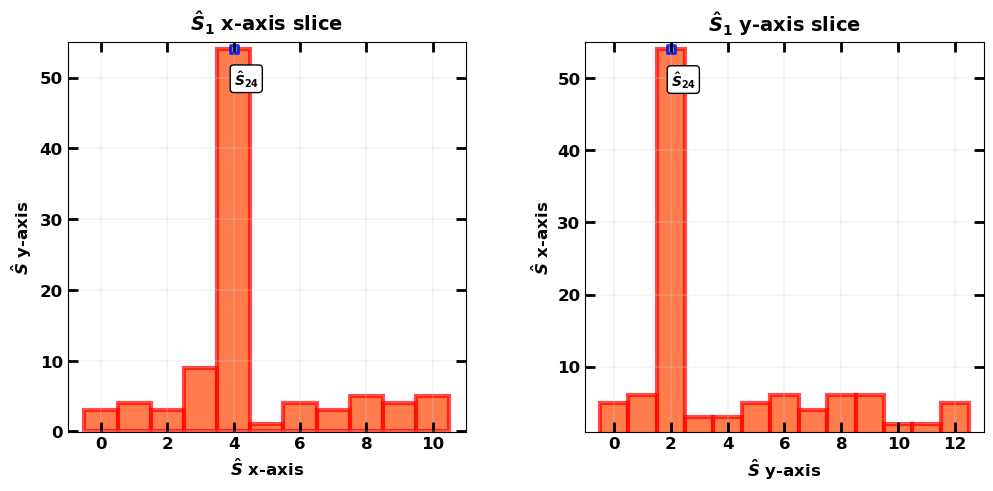

In [19]:
def _normalize(array):
    return (array - array.min())/(array.max() - array.min())

# plot mask, decoder and PSF
mask = source_info['mask_pattern']
decoder = source_info['mask_decoder']
psf = source_info['mask_PSF']

plot.image_plot([mask, decoder, psf],
                ["URA Mask Pattern", "Mask Decoder", "URA Mask PSF"],
                cbarlabel=["Aperture", None, "Counts"],
                cbarvalues=[[0, 1], [decoder.min(), decoder.max()], None],
                cbarcmap=[lc(["DodgerBlue", "DeepSkyBlue"]), lc(["DeepPink", "Orange"]), "inferno"])

# plot sky image, sky reconstruction and SNR
sky_image = source_info['sky_image']
snr = source_info['sky_reconstruction_SNR']

plot.image_plot([_normalize(sky_image), _normalize(sky_reconstruction), snr],
                ["Simulated Sky Image", "Reconstructed Sky Image", "SNR for Reconstructed Sky"],
                cbarlabel=["Counts"]*2 + ["SNR"],
                cbarvalues=[None]*3,
                cbarcmap=["inferno"]*2 + ["rainbow"])

# plot reconstr_sky slices
idx = 1
pos = source_info['sources_pos'][idx]
S_hat_slicex = sky_reconstruction[pos[0], :]
S_hat_slicey = sky_reconstruction[:, pos[1]]

plot.sequence_plot([S_hat_slicex, S_hat_slicey],
                   [f"$\\hat{{S}}_{idx}$ x-axis slice", f"$\\hat{{S}}_{idx}$ y-axis slice"],
                   xlabel=["$\\hat{{S}}$ x-axis", "$\\hat{{S}}$ y-axis"],
                   ylabel=["$\\hat{{S}}$ y-axis", "$\\hat{{S}}$ x-axis"],
                   style=["bar"]*2,
                   simulated_sources=[(pos[1], *pos, -5), (pos[0], *pos, -5)])

**Tests**

In [18]:
test_ura = TestReconstruction(pattern_type)
tol = 2

test_ura.test_sky_reconstruction(sky_reconstruction, sky_image, tol)
test_ura.test_sources_reconstruction(source_info['reconstructed_fluxes'], source_info['sky_image_fluxes'], tol)

#### URA Coded Mask Sky Reconstruction Test ####
|S_hat - S| < 2 : True

#### URA Coded Mask Sources Intensity Reconstruction Test ####
|S_hat[0] - S[0]| < 2 : True
|S_hat[1] - S[1]| < 2 : True
|S_hat[2] - S[2]| < 2 : True


array([ True,  True,  True])

### **MURA Mask Pattern**

**Sky Reconstruction Simulation**

In [20]:
pattern_type = 'mura'
rank = 3
sources_flux = np.array([30, 50, 70])
mask_padding = True
sky_background_rate = 5
sources_pos = None
detector_background_rate = None
print_info = True

cai_args_mura = (pattern_type, rank, sources_flux, mask_padding, sky_background_rate,
                 sources_pos, detector_background_rate, print_info)

detector_image, sky_reconstruction, source_info = cai.cai_simulation(*cai_args_mura)

Mask pattern type: MURA
 Basic pattern shape: (29, 29)
 Mask shape: (57, 57)
 Decoder shape: (57, 57)
 Detector image shape: (29, 29)
 Sky reconstruction image shape: (29, 29)


**Mask and Sky Interface**

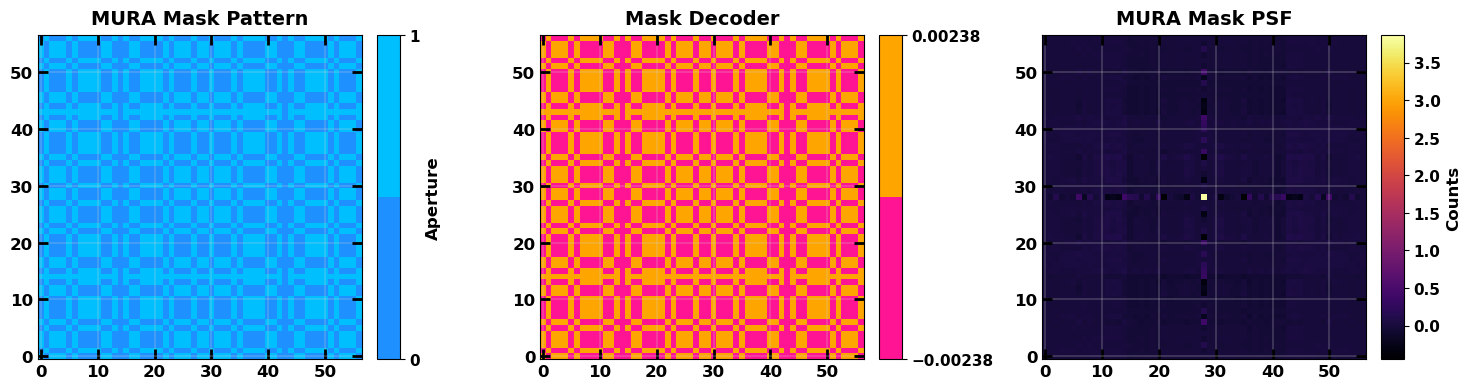

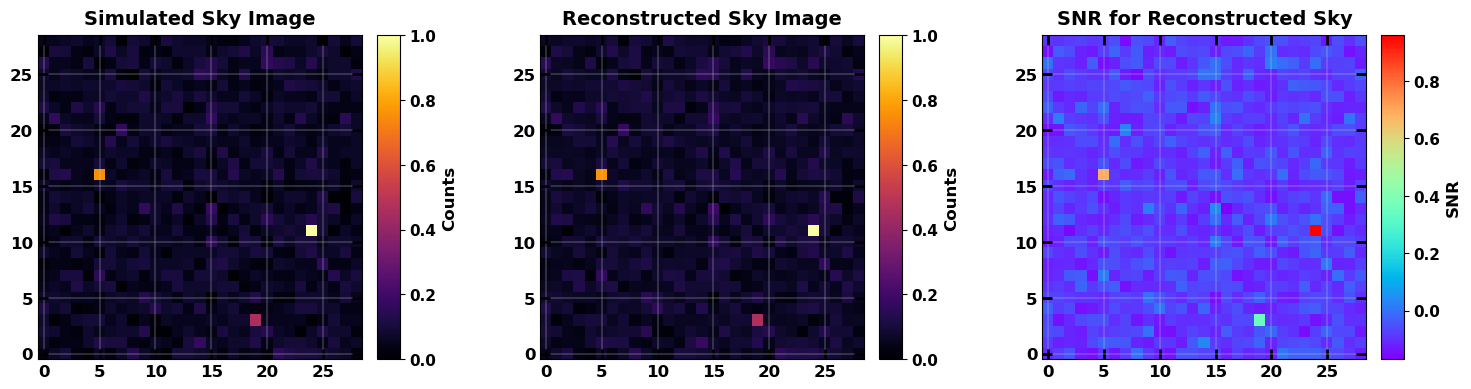

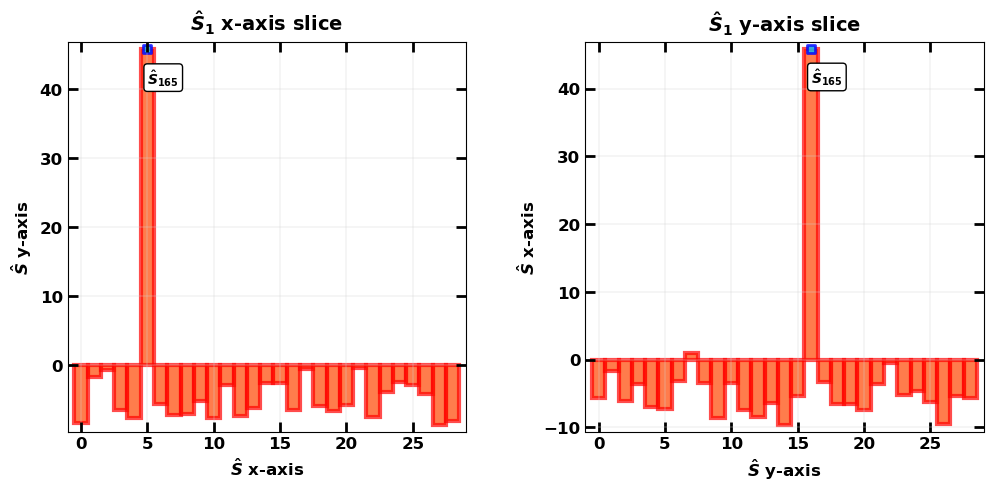

In [21]:
def _normalize(array):
    return (array - array.min())/(array.max() - array.min())

# plot mask, decoder and PSF
mask = source_info['mask_pattern']
decoder = source_info['mask_decoder']
psf = source_info['mask_PSF']

plot.image_plot([mask, decoder, psf],
                ["MURA Mask Pattern", "Mask Decoder", "MURA Mask PSF"],
                cbarlabel=["Aperture", None, "Counts"],
                cbarvalues=[[0, 1], [decoder.min(), decoder.max()], None],
                cbarcmap=[lc(["DodgerBlue", "DeepSkyBlue"]), lc(["DeepPink", "Orange"]), "inferno"])

# plot sky image, sky reconstruction and SNR
sky_image = source_info['sky_image']
snr = source_info['sky_reconstruction_SNR']

plot.image_plot([_normalize(sky_image), _normalize(sky_reconstruction), snr],
                ["Simulated Sky Image", "Reconstructed Sky Image", "SNR for Reconstructed Sky"],
                cbarlabel=["Counts"]*2 + ["SNR"],
                cbarvalues=[None]*3,
                cbarcmap=["inferno"]*2 + ["rainbow"])

# plot reconstr_sky slices
idx = 1
pos = source_info['sources_pos'][idx]
S_hat_slicex = sky_reconstruction[pos[0], :]
S_hat_slicey = sky_reconstruction[:, pos[1]]

plot.sequence_plot([S_hat_slicex, S_hat_slicey],
                   [f"$\\hat{{S}}_{idx}$ x-axis slice", f"$\\hat{{S}}_{idx}$ y-axis slice"],
                   xlabel=["$\\hat{{S}}$ x-axis", "$\\hat{{S}}$ y-axis"],
                   ylabel=["$\\hat{{S}}$ y-axis", "$\\hat{{S}}$ x-axis"],
                   style=["bar"]*2,
                   simulated_sources=[(pos[1], *pos, -5), (pos[0], *pos, -5)])

**Tests**

In [29]:
test_ura = TestReconstruction(pattern_type)
tol = 11

test_ura.test_sky_reconstruction(sky_reconstruction, sky_image, tol)
test_ura.test_sources_reconstruction(source_info['reconstructed_fluxes'], source_info['sky_image_fluxes'], tol)

#### MURA Coded Mask Sky Reconstruction Test ####
|S_hat - S| < 11 : False

#### MURA Coded Mask Sources Intensity Reconstruction Test ####
|S_hat[0] - S[0]| < 11 : True
|S_hat[1] - S[1]| < 11 : True
|S_hat[2] - S[2]| < 11 : True


array([ True,  True,  True])